## car sell performance classification
Take Home Challenge<br>
Haoyang Han

Question:

The data consists of information available at the time a price was **quoted** for the car, as well as the date it was **listed**, the date it was **sold**, and whether it was a poor performer or not, and whether it was a poor performer or not. We would like you to build a model to accurately predict (at the time a car is quoted) which of the cars will not sell well <font color=#A52A2A>(‘poor_performer’ = 1)</font>. Being able to know in advance which cars will not perform well on our platform helps us better manage our inventory.<br>
The goal of this challenge is to get an idea of how you approach a machine learning problem. We are interested in how you think critically about the problem and how you interpret your results. Your analysis is more important than your final number.
<br><br>

Possible Questions:<br>
1. Characterize how well your model performs at predicting poor performers<br>
2. What other data would you like to add to the model to boost performance?<br>
3. What next steps would you take to improve the model?<br>
4. Assume we want to compute this model each time we quote a car. Describe how you would overcome any particular challenges to deploying your model in a live production environment

---


My Solution:

Outline:

1. Why this problem important?
2. Data import, pre-processing, description, visulization.
    - Descriptive statistics summary.
    - encoding categorical data
    - Check special columns, missing value, outliers, standardization
    - multivariate study(Correlation).
    - relation between feature and response variable.
    
    
    
3. Develop model.
    - unbiased check
    - Create baseline model.
    - Define evaluation metric.
    - Using advanced model to improve performance.
    - Parameter tuning.
    
4. Next Steps
    - Develop interaction terms.
    - Advanced feature engineering.
    - Develop automatically pipeline.
    - Develop more detailed classification.
    - More models: Predicting 
5. Conclusion

### 1. Problem Scenario.

In this case we want to build a **binary classification** model to correctly 
build a model to accurately predict (at the time a car is quoted) which of the cars will not sell well. This problem is valuable because of following aspects:

1. optimize inventory management by reducing porpotion of poor-performing car.


2. develop recommendation system for well-performing car.

3. based on this simple binary classification model, we can make other advanced model. For example, predicting how many days a specific type of car needed to be sold(**regression** problem) or improve the poor_performor metric from a binary label to multiple stage discrete label, then predict how well the performance could be(**multiclass classification**). 

4. Based on those models, we can handle the inventory(quantity, cost) and market demand with more accuracy. Also we can even make sale prediction.




### 2. Data import, pre-processing, description, visulization.
    - Descriptive statistics summary.
    - encoding categorical data
    - Check special columns, missing value, outliers, standardization
    - multivariate study(Correlation).
    - relation between feature and response variable.

#### 2.1 Ioad and inspect data

import dataset and initial check to columns.

In [3]:
# !pip install brewer2mpl
# import necessary package

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}


plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


In [4]:
# import dataset
data = pd.read_csv('carListings.csv')

print(data.shape)
data.head(5)

(2500, 33)


,vehicle_id,quote_date,quoted_list_price,listing_region,first_listed_at,date_sold,buyer_source,percent_to_market,exterior_color,interior_color,odometer,num_owners,num_accidents,is_lease,style_id,year,make,model,trim,body_type,num_doors,drivetrain,engine_type,fuel_type,fuel_economy_city,fuel_economy_highway,engine_cylinder_count,engine_cylinder_layout,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
0,28767986,2017-08-28,11700,San Francisco,2017-08-30,2017-09-28,D,1.01061,Ice Blue,Carbon Black,26292,2.00000,0.00000,f,79204337,2012,MINI,Cooper,Base,coupe,2,front-wheel-drive,internal-combustion,gasoline,29.00000,37.00000,4.00000,inline,1.60000,natural,automatic,6-speed,0
1,26325482,2017-09-11,27100,San Francisco,2017-10-05,2017-11-18,D,0.83272,Steel Gray Metallic,NaN,40876,1.00000,1.00000,f,77218392,2015,Mercedes-Benz,C-Class,C 300,sedan,4,all-wheel-drive,internal-combustion,gasoline,24.00000,31.00000,4.00000,inline,2.00000,turbocharger,automatic,7-speed,0
2,20961197,2017-05-22,26200,San Francisco,2017-06-01,2017-07-21,B,0.92125,NaN,NaN,39500,4.00000,0.00000,f,79901508,2010,Dodge,Challenger,SRT8,coupe,2,rear-wheel-drive,internal-combustion,gasoline,13.00000,22.00000,8.00000,v,6.10000,natural,manual,6-speed,0
3,23831282,2018-01-14,18100,San Francisco,2018-01-15,2018-03-29,D,0.97243,Meteor Gray Mica,Black,7471,1.00000,0.00000,f,74490250,2016,Mazda,Mazda3,i Touring,sedan,4,front-wheel-drive,internal-combustion,gasoline,30.00000,41.00000,4.00000,inline,2.00000,natural,automatic,6-speed,0
4,20994895,2017-12-24,17400,San Francisco,2017-12-27,2018-03-23,D,0.89939,Savile Gray Metallic,Off-Black,62288,1.00000,0.00000,f,72870758,2015,Volvo,S60,T5 Drive-E Platinum,sedan,4,front-wheel-drive,internal-combustion,gasoline,25.00000,37.00000,4.00000,inline,2.00000,turbocharger,automatic,8-speed,0


This data is complicated with following kind of columns:

1. Unique ID: vehicle_id. Should be totally irrelavant to poor-performer.
2. int/float number: could be directly used but need scaling(standardization).
3. Date: we could say thatt vehicle_id
4. Categorial: if the category level is not huge(let's say, listing_region has only 2 category), then we use encoder to transform it into discrete number. If the category level is **huge**, we need to do data transformation, or delete the feature.

In [5]:
# delete the vehicle_id column
data = data.iloc[:,1:]
data.head()

,quote_date,quoted_list_price,listing_region,first_listed_at,date_sold,buyer_source,percent_to_market,exterior_color,interior_color,odometer,num_owners,num_accidents,is_lease,style_id,year,make,model,trim,body_type,num_doors,drivetrain,engine_type,fuel_type,fuel_economy_city,fuel_economy_highway,engine_cylinder_count,engine_cylinder_layout,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
0,2017-08-28,11700,San Francisco,2017-08-30,2017-09-28,D,1.01061,Ice Blue,Carbon Black,26292,2.00000,0.00000,f,79204337,2012,MINI,Cooper,Base,coupe,2,front-wheel-drive,internal-combustion,gasoline,29.00000,37.00000,4.00000,inline,1.60000,natural,automatic,6-speed,0
1,2017-09-11,27100,San Francisco,2017-10-05,2017-11-18,D,0.83272,Steel Gray Metallic,NaN,40876,1.00000,1.00000,f,77218392,2015,Mercedes-Benz,C-Class,C 300,sedan,4,all-wheel-drive,internal-combustion,gasoline,24.00000,31.00000,4.00000,inline,2.00000,turbocharger,automatic,7-speed,0
2,2017-05-22,26200,San Francisco,2017-06-01,2017-07-21,B,0.92125,NaN,NaN,39500,4.00000,0.00000,f,79901508,2010,Dodge,Challenger,SRT8,coupe,2,rear-wheel-drive,internal-combustion,gasoline,13.00000,22.00000,8.00000,v,6.10000,natural,manual,6-speed,0
3,2018-01-14,18100,San Francisco,2018-01-15,2018-03-29,D,0.97243,Meteor Gray Mica,Black,7471,1.00000,0.00000,f,74490250,2016,Mazda,Mazda3,i Touring,sedan,4,front-wheel-drive,internal-combustion,gasoline,30.00000,41.00000,4.00000,inline,2.00000,natural,automatic,6-speed,0
4,2017-12-24,17400,San Francisco,2017-12-27,2018-03-23,D,0.89939,Savile Gray Metallic,Off-Black,62288,1.00000,0.00000,f,72870758,2015,Volvo,S60,T5 Drive-E Platinum,sedan,4,front-wheel-drive,internal-combustion,gasoline,25.00000,37.00000,4.00000,inline,2.00000,turbocharger,automatic,8-speed,0


#### 2.2 encoding categorical data



Some Categorical data is straightforward and simple, we could use encoder to handle them easily. For example:

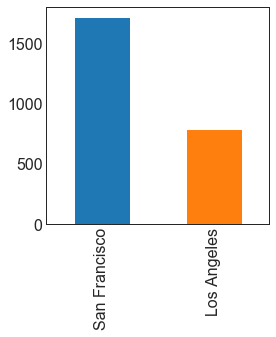

In [6]:
plt.figure(figsize = (4,4))
data['listing_region'].value_counts().plot(kind='bar')

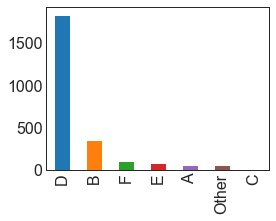

In [7]:
plt.figure(figsize = (4,3))
data['buyer_source'].value_counts().plot(kind='bar')

In [8]:
# here is all the categorical data.
# attention that some columns seems to be numerical data are also categorical.
categorical = ['listing_region', 'buyer_source', 'exterior_color', 'interior_color',
               'is_lease', 'make', 'model', 'trim',
               'body_type', 'drivetrain', 'engine_type', 'fuel_type',
              'engine_cylinder_layout', 'engine_aspiration', 'transmission_type', 'transmission_gearbox']

In [9]:
'''
detecting nan value and transform
we transform 
'''
data[categorical].isnull().sum()

listing_region              0
buyer_source                0
exterior_color            435
interior_color            555
is_lease                    0
make                        0
model                       0
trim                        0
body_type                   0
drivetrain                  0
engine_type                 0
fuel_type                   0
engine_cylinder_layout     46
engine_aspiration           0
transmission_type           0
transmission_gearbox        0
dtype: int64

In [10]:
# replace np.nan by 'nan'
have_null_value = ['exterior_color', 'interior_color', 'engine_cylinder_layout']

for i in range(len(have_null_value)):
    data[have_null_value[i]] = data[have_null_value[i]].apply(lambda x: 'nan' if type(x) == float else x)
    
data[categorical].isnull().sum()

listing_region            0
buyer_source              0
exterior_color            0
interior_color            0
is_lease                  0
make                      0
model                     0
trim                      0
body_type                 0
drivetrain                0
engine_type               0
fuel_type                 0
engine_cylinder_layout    0
engine_aspiration         0
transmission_type         0
transmission_gearbox      0
dtype: int64

In [11]:
num_class = [(data[i].value_counts().shape[0], i) for i in categorical]
sorted(num_class)

[(2, 'is_lease'),
 (2, 'listing_region'),
 (2, 'transmission_type'),
 (3, 'engine_type'),
 (4, 'drivetrain'),
 (4, 'engine_cylinder_layout'),
 (5, 'engine_aspiration'),
 (6, 'fuel_type'),
 (7, 'buyer_source'),
 (8, 'body_type'),
 (8, 'transmission_gearbox'),
 (35, 'make'),
 (197, 'interior_color'),
 (261, 'model'),
 (374, 'trim'),
 (551, 'exterior_color')]

Here We noticed that exterior_color, trim, model, and interior_color have **so much level** that it's encoding could be difficult. I will delete those columns for our initial attempt but those columns should be useful. 

In [12]:
excluded = ['exterior_color', 'trim', 'model', 'interior_color']

In [13]:
for i in range(len(categorical)):
    if categorical[i] not in excluded:
        print(categorical[i])
        encoder = LabelEncoder()
        encoder.fit(data[categorical[i]])
        data[categorical[i]] = encoder.transform(data[categorical[i]])
    else:
        data = data.drop(columns = categorical[i])

listing_region
buyer_source
is_lease
make
body_type
drivetrain
engine_type
fuel_type
engine_cylinder_layout
engine_aspiration
transmission_type
transmission_gearbox


In [14]:
# now let's describe the whole dataset
data.describe()

,quoted_list_price,listing_region,buyer_source,percent_to_market,odometer,num_owners,num_accidents,is_lease,style_id,year,make,body_type,num_doors,drivetrain,engine_type,fuel_type,fuel_economy_city,fuel_economy_highway,engine_cylinder_count,engine_cylinder_layout,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
count,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2448.00000,2449.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2478.00000,2482.00000,2489.00000,2500.00000,2491.00000,2500.00000,2500.00000,2500.00000,2500.00000
mean,16692.99760,0.68600,2.82600,0.94139,48397.12400,1.60131,0.14373,0.04080,74946824.44520,2012.60120,17.41200,3.68440,3.72680,1.75360,1.89360,3.75280,24.87853,32.30459,4.66533,1.43960,2.51108,1.44480,0.07120,3.85720,0.15240
std,7225.02743,0.46421,1.08563,0.07376,27696.47013,0.69879,0.40695,0.19787,2886173.16032,2.44273,11.05672,1.55851,0.68494,0.92975,0.32237,0.72326,8.68031,6.62820,1.06957,0.89503,1.34374,0.83620,0.25721,1.90784,0.35948
min,4300.00000,0.00000,0.00000,0.69602,52.00000,1.00000,0.00000,0.00000,70000556.00000,2005.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,12.00000,17.00000,3.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,11500.00000,0.00000,3.00000,0.90274,27069.50000,1.00000,0.00000,0.00000,72425592.50000,2011.00000,9.00000,2.00000,4.00000,2.00000,2.00000,4.00000,19.00000,28.00000,4.00000,1.00000,1.80000,1.00000,0.00000,3.00000,0.00000
50%,15150.00000,1.00000,3.00000,0.94069,45000.00000,1.00000,0.00000,0.00000,74964433.00000,2013.00000,17.00000,4.00000,4.00000,2.00000,2.00000,4.00000,23.00000,32.00000,4.00000,1.00000,2.40000,1.00000,0.00000,3.00000,0.00000
75%,20100.00000,1.00000,3.00000,0.96817,65480.25000,2.00000,0.00000,0.00000,77502198.50000,2014.00000,30.00000,5.00000,4.00000,2.00000,2.00000,4.00000,27.00000,36.00000,6.00000,2.00000,3.00000,1.00000,0.00000,5.00000,0.00000
max,58800.00000,1.00000,6.00000,1.31383,198271.00000,6.00000,5.00000,1.00000,79992931.00000,2017.00000,34.00000,7.00000,4.00000,3.00000,2.00000,5.00000,60.00000,51.00000,8.00000,3.00000,39.50000,4.00000,1.00000,7.00000,1.00000


In [15]:
data.to_csv('2_2.csv')

#### 2.3 Check special columns, missing value, outliers, standardization

There are some special columns that needed to be processed individually. First I will delete *style_id* since this column have 1634 different level.

For time data, I would like to delete column *quote_date*, *first_listed_at*, and *date_sold* in baseline model since they are date variable which should have less impact to model. 

**ATTENTION** that if we develop an interaction term by substract *date_sold* by *first_listed_at*(listed below), this column would be extremely important and directly related to target variable. <font color=#A52A2A>But it's wrong.</font> When we using this model to predict performance at the time of quoting the car, we do not know when it will be sold. date_sold column shouldn't stay in dataset if it's not the information we could get for prediction.

For year column, I will use a min_max scalar but the max scalar should be current year(2019).

In [16]:
data['style_id'].value_counts().shape

(1634,)

In [17]:
# data['sell_time'] = (pd.to_datetime(data['date_sold']) - pd.to_datetime(data['first_listed_at'])).dt.days

In [18]:
data = data.drop(columns = ['style_id', 'quote_date', 'first_listed_at', 'date_sold'])

In [19]:
data['year'] = (data['year'] - data['year'].min())/(2019 - data['year'].min())

After finish those procedure, we are going to check outliers and do standardization toward dataset.

In [20]:
data.describe()

,quoted_list_price,listing_region,buyer_source,percent_to_market,odometer,num_owners,num_accidents,is_lease,year,make,body_type,num_doors,drivetrain,engine_type,fuel_type,fuel_economy_city,fuel_economy_highway,engine_cylinder_count,engine_cylinder_layout,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
count,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2448.00000,2449.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2478.00000,2482.00000,2489.00000,2500.00000,2491.00000,2500.00000,2500.00000,2500.00000,2500.00000
mean,16692.99760,0.68600,2.82600,0.94139,48397.12400,1.60131,0.14373,0.04080,0.54294,17.41200,3.68440,3.72680,1.75360,1.89360,3.75280,24.87853,32.30459,4.66533,1.43960,2.51108,1.44480,0.07120,3.85720,0.15240
std,7225.02743,0.46421,1.08563,0.07376,27696.47013,0.69879,0.40695,0.19787,0.17448,11.05672,1.55851,0.68494,0.92975,0.32237,0.72326,8.68031,6.62820,1.06957,0.89503,1.34374,0.83620,0.25721,1.90784,0.35948
min,4300.00000,0.00000,0.00000,0.69602,52.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.00000,0.00000,0.00000,0.00000,12.00000,17.00000,3.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,11500.00000,0.00000,3.00000,0.90274,27069.50000,1.00000,0.00000,0.00000,0.42857,9.00000,2.00000,4.00000,2.00000,2.00000,4.00000,19.00000,28.00000,4.00000,1.00000,1.80000,1.00000,0.00000,3.00000,0.00000
50%,15150.00000,1.00000,3.00000,0.94069,45000.00000,1.00000,0.00000,0.00000,0.57143,17.00000,4.00000,4.00000,2.00000,2.00000,4.00000,23.00000,32.00000,4.00000,1.00000,2.40000,1.00000,0.00000,3.00000,0.00000
75%,20100.00000,1.00000,3.00000,0.96817,65480.25000,2.00000,0.00000,0.00000,0.64286,30.00000,5.00000,4.00000,2.00000,2.00000,4.00000,27.00000,36.00000,6.00000,2.00000,3.00000,1.00000,0.00000,5.00000,0.00000
max,58800.00000,1.00000,6.00000,1.31383,198271.00000,6.00000,5.00000,1.00000,0.85714,34.00000,7.00000,4.00000,3.00000,2.00000,5.00000,60.00000,51.00000,8.00000,3.00000,39.50000,4.00000,1.00000,7.00000,1.00000


feels like column engine_displacement_liters has outliers since 75% percentile value is 3 and maximum is 39.5.

In [21]:
# here we detect the tail part of this colume.
data['engine_displacement_liters'][data['engine_displacement_liters']>3].value_counts()/2500

3.50000    0.10040
3.60000    0.02840
3.70000    0.02560
4.00000    0.01120
3.30000    0.00680
5.00000    0.00680
3.20000    0.00560
4.60000    0.00400
5.30000    0.00400
6.20000    0.00400
5.70000    0.00280
3.80000    0.00160
4.70000    0.00120
4.40000    0.00120
6.30000    0.00080
4.30000    0.00080
4.80000    0.00080
6.00000    0.00080
39.50000   0.00080
3.40000    0.00080
4.20000    0.00080
5.80000    0.00040
5.60000    0.00040
6.10000    0.00040
6.70000    0.00040
5.50000    0.00040
Name: engine_displacement_liters, dtype: float64

I will transfer all value larger than 4.0 to be 4.

In [22]:
data['engine_displacement_liters'] = data['engine_displacement_liters'].apply(lambda x: 4 if x > 4 else x)

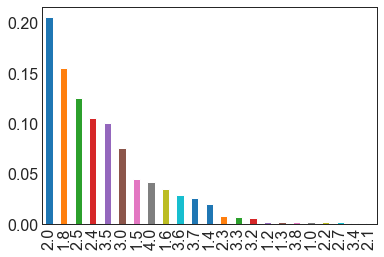

In [23]:
# attention that all value larger than 4 have percentage less than 5%, so it's accepeable.
(data['engine_displacement_liters'].value_counts()/2500).plot(kind='bar')

Next. plug missing value by mean.

In [24]:
for i in range(data.shape[1]-1):
    if int(data.iloc[:,i:i+1].isnull().sum()) > 0:
        imp = Imputer(missing_values='NaN', strategy='mean')
        imp.fit(data.iloc[:,i:i+1])
        data.iloc[:,i:i+1] = imp.transform(data.iloc[:,i:i+1])
        
data.isnull().sum()

quoted_list_price             0
listing_region                0
buyer_source                  0
percent_to_market             0
odometer                      0
num_owners                    0
num_accidents                 0
is_lease                      0
year                          0
make                          0
body_type                     0
num_doors                     0
drivetrain                    0
engine_type                   0
fuel_type                     0
fuel_economy_city             0
fuel_economy_highway          0
engine_cylinder_count         0
engine_cylinder_layout        0
engine_displacement_liters    0
engine_aspiration             0
transmission_type             0
transmission_gearbox          0
poor_performer                0
dtype: int64

Finally, we will do standardization to all variable to make sure all features have same importance.

In [25]:
for i in range(data.shape[1] -1):
    data.iloc[:,i:i+1] = (data.iloc[:,i:i+1] - data.iloc[:,i:i+1].mean())/data.iloc[:,i:i+1].std()

In [26]:
data.describe()

,quoted_list_price,listing_region,buyer_source,percent_to_market,odometer,num_owners,num_accidents,is_lease,year,make,body_type,num_doors,drivetrain,engine_type,fuel_type,fuel_economy_city,fuel_economy_highway,engine_cylinder_count,engine_cylinder_layout,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
count,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000
mean,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.15240
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.35948
min,-1.71529,-1.47778,-2.60309,-3.32651,-1.74553,-0.86960,-0.35685,-0.20620,-3.11176,-1.57479,-2.36405,-2.52108,-1.88610,-5.87405,-5.18875,-1.49022,-2.31737,-1.56045,-1.60844,-1.98421,-1.72781,-0.27682,-2.02176,0.00000
25%,-0.71875,-1.47778,0.16028,-0.52396,-0.77005,-0.86960,-0.35685,-0.20620,-0.65550,-0.76080,-1.08077,0.39886,0.26502,0.33006,0.34179,-0.68023,-0.65179,-0.62343,-0.49116,-0.88553,-0.53193,-0.27682,-0.44930,0.00000
50%,-0.21356,0.67642,0.16028,-0.00950,-0.12266,-0.00000,-0.35685,-0.20620,0.16326,-0.03726,0.20250,0.39886,0.26502,0.33006,0.34179,-0.21737,-0.04612,-0.62343,-0.49116,-0.06153,-0.53193,-0.27682,-0.44930,0.00000
75%,0.47156,0.67642,0.16028,0.36299,0.61680,0.57658,-0.35685,-0.20620,0.57264,1.13849,0.84414,0.39886,0.26502,0.33006,0.34179,0.24548,0.55955,1.25062,0.62613,0.76248,-0.53193,-0.27682,0.59900,0.00000
max,5.82794,0.67642,2.92364,5.04918,5.41130,6.36129,12.05703,4.84772,1.80077,1.50026,2.12741,0.39886,1.34058,0.33006,1.72442,4.06404,2.83080,3.12466,1.74341,2.13582,3.05572,3.61106,1.64731,1.00000


#### 2.4 Correlation
Calculating Heatmap Matrix for correlation test.

'\nin this heatmap, the brighter color is, more relevant there exist. We set the 0.6 as highly correlated.\n'

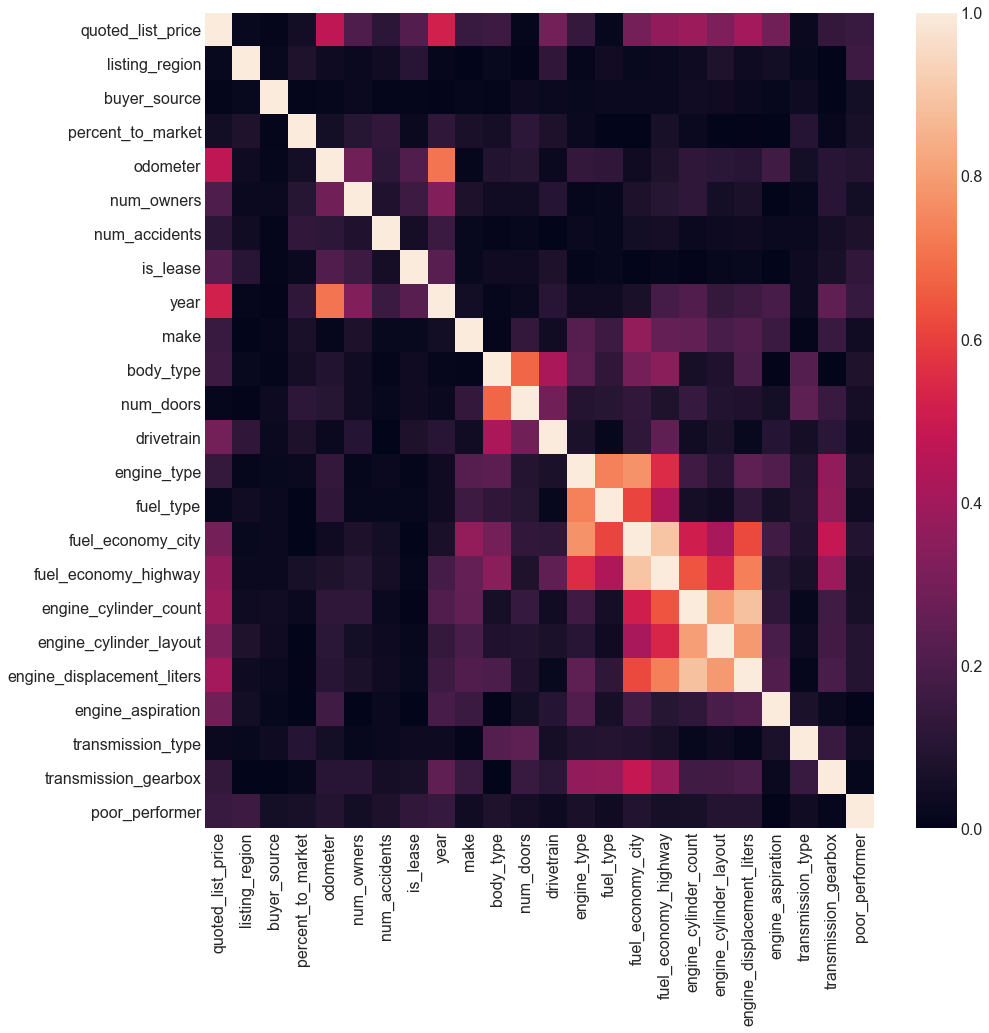

In [27]:
plt.figure(figsize = (15, 15))
sns.heatmap(abs(data.corr()))
'''
in this heatmap, the brighter color is, more relevant there exist. We set the 0.6 as highly correlated.
'''

It's obvious that the data have highly correlated items. they are:

In [28]:
corr_matrix = data.corr()
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if i > j and corr_matrix.iloc[i:i+1,j:j+1].values[0][0] > 0.6:
            print('the %s and %s column highly correlated, position %d, %d, correlation %f'%(list(corr_matrix.index)[i], corr_matrix.columns[j], i, j, corr_matrix.iloc[i:i+1,j:j+1].values[0][0]))
            
        

the num_doors and body_type column highly correlated, position 11, 10, correlation 0.678661
the fuel_type and engine_type column highly correlated, position 14, 13, correlation 0.734991
the fuel_economy_highway and fuel_economy_city column highly correlated, position 16, 15, correlation 0.897346
the engine_cylinder_layout and engine_cylinder_count column highly correlated, position 18, 17, correlation 0.801056
the engine_displacement_liters and engine_cylinder_count column highly correlated, position 19, 17, correlation 0.887600
the engine_displacement_liters and engine_cylinder_layout column highly correlated, position 19, 18, correlation 0.790580


Those correlations have real-world explaination. <br>
Body_type directly decide how many doors cars have, so I delete body type.<br>
fuel type and engine type is also related, but fuel time have more categories(more inforamtion), so I delete engine type<br>
similarily, I will delete fuel_economy_highway, engine_cylinder_layout and engine_cylinder_count.

---
Gladly poor performer have no significant correlation with all variables.


In [29]:
data = data.drop(columns = ['body_type','engine_type', 'fuel_economy_highway', 'engine_cylinder_layout', 'engine_cylinder_count'])

In [30]:
data.describe()

,quoted_list_price,listing_region,buyer_source,percent_to_market,odometer,num_owners,num_accidents,is_lease,year,make,num_doors,drivetrain,fuel_type,fuel_economy_city,engine_displacement_liters,engine_aspiration,transmission_type,transmission_gearbox,poor_performer
count,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000,2500.00000
mean,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.15240
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.35948
min,-1.71529,-1.47778,-2.60309,-3.32651,-1.74553,-0.86960,-0.35685,-0.20620,-3.11176,-1.57479,-2.52108,-1.88610,-5.18875,-1.49022,-1.98421,-1.72781,-0.27682,-2.02176,0.00000
25%,-0.71875,-1.47778,0.16028,-0.52396,-0.77005,-0.86960,-0.35685,-0.20620,-0.65550,-0.76080,0.39886,0.26502,0.34179,-0.68023,-0.88553,-0.53193,-0.27682,-0.44930,0.00000
50%,-0.21356,0.67642,0.16028,-0.00950,-0.12266,-0.00000,-0.35685,-0.20620,0.16326,-0.03726,0.39886,0.26502,0.34179,-0.21737,-0.06153,-0.53193,-0.27682,-0.44930,0.00000
75%,0.47156,0.67642,0.16028,0.36299,0.61680,0.57658,-0.35685,-0.20620,0.57264,1.13849,0.39886,0.26502,0.34179,0.24548,0.76248,-0.53193,-0.27682,0.59900,0.00000
max,5.82794,0.67642,2.92364,5.04918,5.41130,6.36129,12.05703,4.84772,1.80077,1.50026,0.39886,1.34058,1.72442,4.06404,2.13582,3.05572,3.61106,1.64731,1.00000


In [53]:
# data.to_csv('2_5.csv')

#### 2.5 h2o package for data glance.

Before start to develop model from scratch, we could use 5 minutes to develop a h2o flow for a overall look to model fitting pipeline. In that package, fitted model could automacially calculate the feature importance. This should be a good baseline of measuring feature importance.

In [31]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "9.0.4"; Java(TM) SE Runtime Environment (build 9.0.4+11); Java HotSpot(TM) 64-Bit Server VM (build 9.0.4+11, mixed mode)
  Starting server from /Users/kevin/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/sx/gztz1y9j0yq1dm597lsrf6bc0000gn/T/tmpse16zva3
  JVM stdout: /var/folders/sx/gztz1y9j0yq1dm597lsrf6bc0000gn/T/tmpse16zva3/h2o_kevin_started_from_python.out
  JVM stderr: /var/folders/sx/gztz1y9j0yq1dm597lsrf6bc0000gn/T/tmpse16zva3/h2o_kevin_started_from_python.err


/Users/kevin/anaconda3/lib/python3.6/site-packages/h2o/backend/server.py:138: ResourceWarning: unclosed file <_io.TextIOWrapper name='/var/folders/sx/gztz1y9j0yq1dm597lsrf6bc0000gn/T/tmpse16zva3/h2o_kevin_started_from_python.out' mode='w' encoding='UTF-8'>
  bind_to_localhost=bind_to_localhost, log_dir=log_dir, log_level=log_level)
/Users/kevin/anaconda3/lib/python3.6/site-packages/h2o/backend/server.py:138: ResourceWarning: unclosed file <_io.TextIOWrapper name='/var/folders/sx/gztz1y9j0yq1dm597lsrf6bc0000gn/T/tmpse16zva3/h2o_kevin_started_from_python.err' mode='w' encoding='UTF-8'>
  bind_to_localhost=bind_to_localhost, log_dir=log_dir, log_level=log_level)


  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.1
H2O cluster version age:,16 days
H2O cluster name:,H2O_from_python_kevin_znjk4b
H2O cluster total nodes:,1
H2O cluster free memory:,4 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


![feature_importance](h2o_feature.png)

It's founded that:
1. percent_to_market
2. odometer
3. quoted_list_price
4. maker
5. fuel_economy
6. year

those factors decide whether the car could sell well or not. Those features match our expectation to real-world car purchase consideration.

### 3. Develop model.
    - unbiased check
    - Create baseline model.
    - Define evaluation metric.
    - Using advanced model to improve performance.
    - Parameter tuning.

#### 3.1 Unbiased check

In [32]:
data['poor_performer'].value_counts().max()/data['poor_performer'].value_counts().min()

5.561679790026247

This dataset is somehow unbiased, so we could do oversampling(since dataset is not large enough to get undersampling) to dataset in future step.<br>

Since in picking out all well-performed car and leave those bad-performed car away are both important, simple recall or precision could not explain model well. Here I will choose **AUC/ROC** metric(certainly F1 could also work).

#### 3.2 Baseline Model

Here we choose logistic regression as the baseline model. Here we print out the auc score.

In [51]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [52]:
glm_fit1 = H2OGeneralizedLinearEstimator(family='binomial', model_id='glm_fit1')
glm_fit1.train(x=x, y=y, training_frame=train)
glm_fit1_perf = glm_fit1.model_performance(test)
print(glm_fit1_perf.auc())

glm Model Build progress: |███████████████████████████████████████████████| 100%
0.6628836132020846


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = data.iloc[:,:-1]
y = np.squeeze(data.iloc[:,-1:])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic = LogisticRegression(penalty = 'l2',
                             max_iter = 500)


In [37]:
%time
logistic.fit(X_train, y_train)


CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.11 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_predict_lr = logistic.predict(X_test)

print(roc_auc_score(y_test, y_predict_lr))

0.5116163725592566


#### 3.3 Advanced Model

Here we will try decision tree and random forest, but since those models need parameter tuning, their performance might not good enough.

In [39]:
import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [74]:
data1 = h2o.import_file('2_5.csv')


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [75]:
data1['poor_performer'] = data1['poor_performer'].asfactor()  #encode the binary repsonse as a factor
data1['poor_performer'].levels()

[['0', '1']]

In [76]:
splits = data1.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [77]:
print(train.nrow)
print(valid.nrow)
print(test.nrow)


1763
368
369


In [ ]:
['']

In [78]:
y = 'poor_performer'
x = list(data.columns)
x.remove(y)

In [110]:
rf_fit1 = H2ORandomForestEstimator(model_id='rf_fit1', stopping_metric = "AUC", seed=1)
rf_fit1.train(x=x, y=y, training_frame=train)


drf Model Build progress: |███████████████████████████████████████████████| 100%


In [111]:
rf_fit2 = H2ORandomForestEstimator(model_id='rf_fit2', stopping_metric = "AUC", ntrees=200, seed=1)
rf_fit2.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [124]:
gb = H2OGradientBoostingEstimator(ntrees=20, max_depth=20, stopping_metric = "AUC", nfolds=4)
gb.train(x=x, y=y, training_frame=train)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [125]:
rf_perf1 = rf_fit1.model_performance(test)
rf_perf2 = rf_fit2.model_performance(test)
gb_perf = gb.model_performance(test)

In [126]:
print(rf_perf1.auc())
print(rf_perf2.auc())
print(gb_perf.auc())

0.7032426172553561
0.7180081065431384
0.69166184134337


In [73]:
print(rf_perf1.auc())
print(rf_perf2.auc())
print(gb_perf.auc())

0.680023161551824
0.710856977417487
0.6715112912565142


In [ ]:
most_relevant = ['percent_to_market', 'odometer', 'quoted_list_price','exterior_color', 'model', 'trim', 'make', 'fuel_economy_city', 'year',
                 'engine_displacement_liters', 'interior_color',
'buyer_source', 'transmission_gearbox', 'num_owners', 'listing_region', 'drivetrain']

### 4. Next Steps
Develop interaction terms.
Advanced feature engineering.
Develop automatically pipeline.
Develop more detailed classification.
More models: Predicting
Conclusion

接下来就是建模了，其实在第二阶段impute完missing value去掉outlier做好这些preprocessing之后建模阶段很简单，先挑一个简单易懂的当做baseline model，然后定义好拿什么当evaluation metric看一下baseline performance，然后就可以套各种常规的或者fancy的model挨个看performance，选top的几个model继续parameter tuning，然后可以继续处理feature，比如说去掉correlated或者纯noise的feature，也可以自己加一些interaction term看看能不能提高model performance。最后选模型的时候能给出合理理由就可以了，比如evaluation metric特别高，运行速度最快，模型比较好解释，在各种情形下非常robust。基本上没有正确答案的，解释的能让人信服就可以了。
最后不要忘了conclusion。夸一下final model的优点，如何可以解决现有问题，最好可以结合公司业务讲一下business value，再给一下未来可以继续做的问题。